MNS Computer Exercise 01

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np

In [2]:
import math 

In [3]:
import matplotlib.pyplot as plt

In [4]:
np.random.seed(10)

# Problem 1 - McCulloch–Pitts neuron

## (a)

In [5]:
def mcculloch_pitts_neuron(w, x):
    return np.sign(np.dot(w.T, x))

sanity check 

In [6]:
w = np.random.normal(0,1,(3,1))
x = np.random.normal(0,1,(3,1))

In [7]:
mcculloch_pitts_neuron(w,x)

array([[1.]])

## (b)

In [8]:
w = np.array([[3,2,2]]).T
X = np.array([
    [-1,-1],
    [-1, 1],
    [ 1,-1],
    [ 1, 1]]).T

In [9]:
X_b = np.concatenate((-np.ones((1,X.shape[1])), X), axis=0)
print(X_b)

[[-1. -1. -1. -1.]
 [-1. -1.  1.  1.]
 [-1.  1. -1.  1.]]


In [10]:
result = mcculloch_pitts_neuron(w,X_b)

In [11]:
print(X)

[[-1 -1  1  1]
 [-1  1 -1  1]]


In [12]:
print(result)

[[-1. -1. -1.  1.]]


the function shows correct result (AND)

# Problem 2 - Activation functions

In [13]:
def sigmoid(x,a):
    return (2 / (1 + np.exp(-a*x))) - 1

In [14]:
def piecewise_linear(x,a):
    thr = 1/a
    gr_a = x >= thr
    ls_a = x <= -thr
    b_a = np.logical_not(np.logical_or(gr_a, ls_a))
    
    ret = a*x
    ret[gr_a] = 1
    ret[ls_a] = -1
    
    return ret

In [15]:
A = [0.1,0.5,1]

In [16]:
X = np.linspace(-10,10,100)

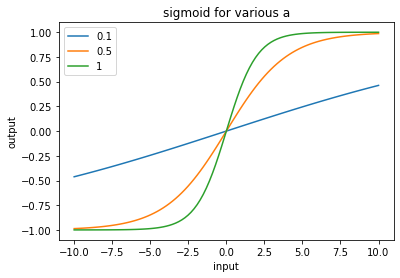

In [17]:
for a in A:
    y = sigmoid(X,a)
    plt.plot(X,y,label=str(a))
plt.legend()
plt.title('sigmoid for various a')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

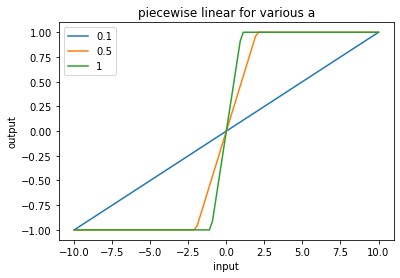

In [18]:
for a in A:
    y = piecewise_linear(X,a)
    plt.plot(X,y,label=str(a))
plt.legend()
plt.title('piecewise linear for various a')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

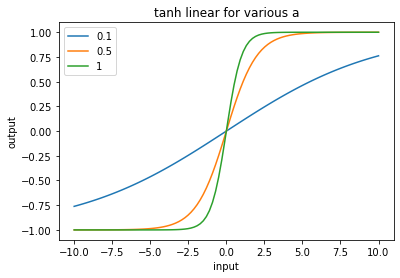

In [19]:
for a in A:
    y = np.tanh(a*X)
    plt.plot(X,y,label=str(a))
plt.legend()
plt.title('tanh linear for various a')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

For the 3 activation functions, bigger a would yield steeper function. Thus, to mimic the step function, choose big value of a

# Problem 3 - Rosenblatt Perceptron

## (a)

In [20]:
mean = 0
var = 1
num_training = 1000
num_validation = 100
epochs = 50
lr = 1e-2

In [21]:
x1 = np.random.normal(mean, var,(1, num_training))
x2 = np.random.normal(mean, var,(1, num_training))

b = -np.ones((1,num_training))
X = np.concatenate((b, x1, x2), axis=0)

In [22]:
m_X = np.logical_not(x2>=0.5-x1)

dx = np.ones_like(x1)
dx[m_X] = -1

## (b)

In [23]:
#W = np.random.normal(mean,var,(X.shape[0],1))
W = np.zeros((X.shape[0],1))

In [24]:
def update_weight(w, lr, dx, x):
    y = mcculloch_pitts_neuron(w, x)
    return w + lr*(dx - y)*x

In [25]:
new_W = W.copy() 
for i in range(epochs):
    
    #print(new_W)
    print('epoch num: {}'.format(i+1))
    old_W = new_W.copy()
    for j in range (num_training):
        #print(X[:,j].reshape((-1,1)).shape)
        new_W = update_weight(new_W, lr, dx[:,j].reshape((-1,1)), X[:,j].reshape((-1,1)))
    print('weight differences : {}'.format(np.square(old_W - new_W).sum()))

epoch num: 1
weight differences : 0.02336780878181753
epoch num: 2
weight differences : 0.0017117432264522423
epoch num: 3
weight differences : 0.0003452312834612598
epoch num: 4
weight differences : 0.0004577380335817221
epoch num: 5
weight differences : 1.2187863386198983e-05
epoch num: 6
weight differences : 0.0
epoch num: 7
weight differences : 0.0
epoch num: 8
weight differences : 0.0
epoch num: 9
weight differences : 0.0
epoch num: 10
weight differences : 0.0
epoch num: 11
weight differences : 0.0
epoch num: 12
weight differences : 0.0
epoch num: 13
weight differences : 0.0
epoch num: 14
weight differences : 0.0
epoch num: 15
weight differences : 0.0
epoch num: 16
weight differences : 0.0
epoch num: 17
weight differences : 0.0
epoch num: 18
weight differences : 0.0
epoch num: 19
weight differences : 0.0
epoch num: 20
weight differences : 0.0
epoch num: 21
weight differences : 0.0
epoch num: 22
weight differences : 0.0
epoch num: 23
weight differences : 0.0
epoch num: 24
weight di

In [26]:
y_train = mcculloch_pitts_neuron(new_W, X)

In [27]:
print('training error : {} '.format(np.square(y_train-dx).mean()))

training error : 0.0 


The choice of learning rate would be a trade-off between the speed of convergence and the possibility of the convergence. Bigger learning rate yield faster convergence but it would possibly never reach the minimum error. On the other hand, using smaller learning rate would guarantee more for the algorithm to reach the minimum error, although it would cost more time. Choosing learning rate value that is not too big and not too small is the best practice for the beginning.

## (c)

In [28]:
x1_val = np.random.normal(mean, var,(1, num_validation))
x2_val = np.random.normal(mean, var,(1, num_validation))

b_val = -np.ones((1,num_validation))
X_val = np.concatenate((b_val, x1_val, x2_val), axis=0)

In [29]:
m_X_val = np.logical_not(x2_val>=0.5-x1_val)

dx_val = np.ones_like(x1_val)
dx_val[m_X_val] = -1

In [30]:
y_val = mcculloch_pitts_neuron(new_W, X_val)

In [31]:
val_error = np.square(y_val - dx_val).mean()
print('validation set error : {}'.format(val_error))

validation set error : 0.0


Here it is shown that the perceptron works well on validation set

## (d)

In [32]:
y_train_bool = y_train ==1

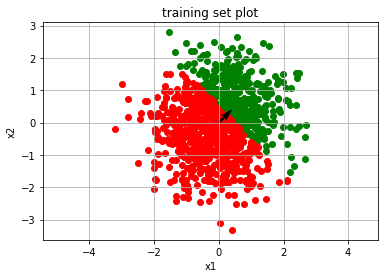

In [33]:
plt.scatter(x1[y_train_bool], x2[y_train_bool],c='green', label='+1')
plt.scatter(x1[np.logical_not(y_train_bool)], x2[np.logical_not(y_train_bool)],c='red', label='-1')
plt.title('training set plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.quiver(new_W[0]*new_W[1], new_W[0]*new_W[2], new_W[1], new_W[2], units = 'xy')
plt.axis('equal')
plt.show()

The data that has direction toward the weight vector would result in positive value. This also can be seen from the dot product equatin in which it contains the cos of the angle between the weight vector and the data. On the other hand, data that has direction on the opposite of the weight vector would give a negative result. 

In addition, when the weight vector direction match the direction of the training datam we might conclude that the training is working well

# Problem 4 - Linear Separability

## (a)

In [34]:
epochs = 10
lr=1e-2

In [35]:
x1 = np.array([[0,0,1,1]])
x2 = np.array([[0,1,0,1]])

In [36]:
y_train_bool = np.logical_xor(x1, x2).reshape((1,-1))
y_train = y_train_bool.astype(int)

In [37]:
b = -np.ones((1,y_train.shape[1]))
X_b = np.concatenate((b, x1, x2), axis=0)

In [38]:
W = np.random.normal(mean,var,(X_b.shape[0],1))
#W = np.zeros((X_b.shape[0],1))

In [39]:
new_W = W.copy() 
for i in range(epochs):
    print('epoch num: {}'.format(i+1))
    old_W = new_W.copy()
    for j in range (X_b.shape[1]):
        new_W = update_weight(new_W, lr, y_train[:,j].reshape((-1,1)), X_b[:,j].reshape((-1,1)))
    print('weight differences : {}'.format(np.square(old_W - new_W).sum()))

epoch num: 1
weight differences : 0.000600000000000001
epoch num: 2
weight differences : 0.000600000000000001
epoch num: 3
weight differences : 0.000600000000000001
epoch num: 4
weight differences : 0.000600000000000001
epoch num: 5
weight differences : 0.000600000000000001
epoch num: 6
weight differences : 0.000600000000000001
epoch num: 7
weight differences : 0.000600000000000001
epoch num: 8
weight differences : 0.000600000000000001
epoch num: 9
weight differences : 0.000600000000000001
epoch num: 10
weight differences : 0.000600000000000001


## (b)

In [40]:
y_predict = mcculloch_pitts_neuron(new_W, X_b)

In [41]:
print('training error : {} '.format(np.square(y_train-y_predict).mean()))

training error : 0.5 


the differences of the weight ,as shown above, does not indicate convergence.  

## (c)

In [42]:
x_boundary = np.linspace(-10,10,100)
y_boundary = (-new_W[1]/new_W[2])*x_boundary -new_W[0]/new_W[2]

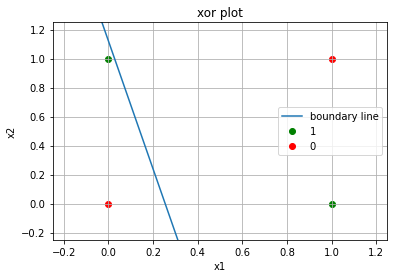

In [43]:
plt.scatter(x1[y_train_bool], x2[y_train_bool],c='green', label='1')
plt.scatter(x1[np.logical_not(y_train_bool)], x2[np.logical_not(y_train_bool)],c='red', label='0')

plt.plot(x_boundary,y_boundary, label='boundary line')

plt.title('xor plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.legend()
plt.grid()
plt.show()

As shown in the plot, there is no possible line that could classify the data. So by using a simple linear model such as one layer perceptron, the weight will never converge, hence the classification would never be good.